In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the data
file_path = "/content/drive/MyDrive/Colab Notebooks/mixbev_txsub.csv"
data = pd.read_csv(file_path)

# relevant features for simplicity
features = [
    'Liquor.Receipts', 'Wine.Receipts', 'Beer.Receipts', 'Cover.Charge.Receipts'
]

# extract features and target variable
X = data[features]
y = data['Total.Receipts']

# missing values if any
data.loc[:, features].fillna(0, inplace=True)
data['Total.Receipts'].fillna(0, inplace=True)

# label encoding for categorical columns
label_encoder = LabelEncoder()
data['Inside.Outside.City.Limits'] = label_encoder.fit_transform(data['Inside.Outside.City.Limits'])
data['Location.City'] = label_encoder.fit_transform(data['Location.City'])
# Add more columns if necessary

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the linear regression model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 1902800.7185846928
R-squared: 0.9990880169899587


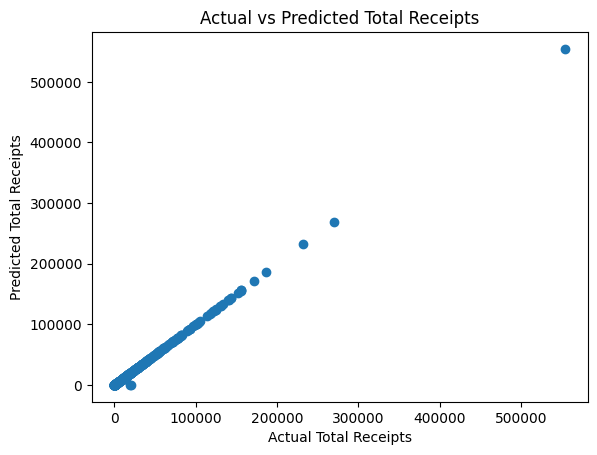

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Receipts")
plt.ylabel("Predicted Total Receipts")
plt.title("Actual vs Predicted Total Receipts")
plt.show()


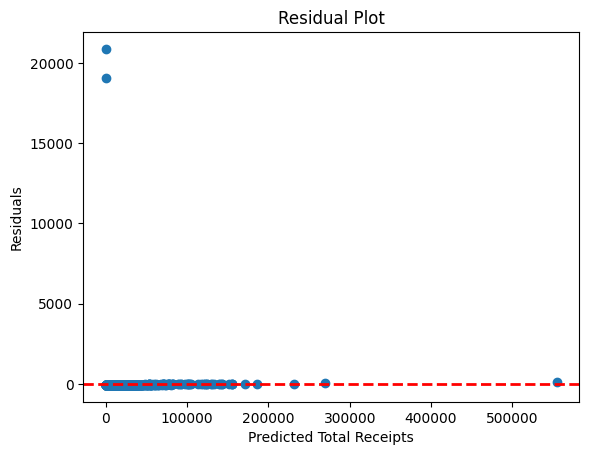

In [6]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Total Receipts")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


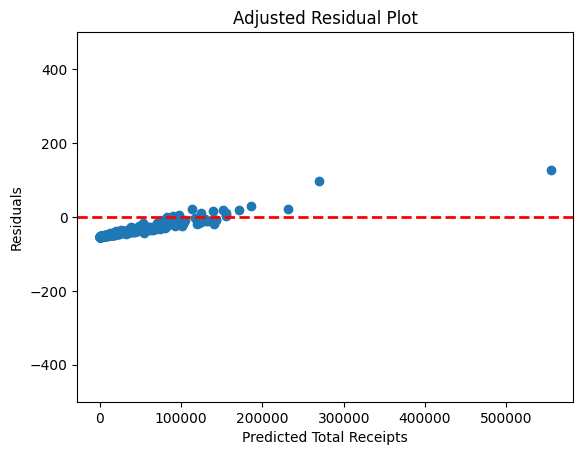

In [12]:
import matplotlib.pyplot as plt

# Assuming 'residuals' is the array of residuals calculated in your code
residuals = y_test - y_pred

# Create a residual plot with zoom
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Total Receipts")
plt.ylabel("Residuals")
plt.title("Adjusted Residual Plot")

# Set y-axis limits to focus on the region of interest
plt.ylim(-500, 500)  # Adjust the limits based on your specific needs

plt.show()
